# Importing files

In [1]:
# Import the necessary modules
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.stats import sigmaclip
import numpy as np
%matplotlib inline
plt.show()
plt.style.use(['fivethirtyeight','seaborn-deep'])

# writing a function

In [2]:
# reading the data

def read(file):
    # Read the FITS image file
    hdulist = fits.open(file)
    data = hdulist[0].data
    # Perform a 3-sigma clipping of the pixel values
    height, width = data.shape

    # calculate the center of the image
    center_x = width // 2
    center_y = height // 2

    # define the size of the box to be extracted
    box_size = 2000

    # calculate the coordinates of the top-left corner of the box
    x0 = center_x - box_size // 2
    y0 = center_y - box_size // 2

    # calculate the coordinates of the bottom-right corner of the box
    x1 = x0 + box_size
    y1 = y0 + box_size

    # extract the box from the image and store it in a new 2D numpy array
    box = data[y0:y1, x0:x1]
    clipped_data = sigmaclip(box, 4, 4)[0]
    return clipped_data, data

In [11]:
def hist(data, title):
    # Identify the background pixels and their mean and standard deviation
#     background_pixels = data[data < np.percentile(data, 3)].flatten()
#     mean = np.mean(background_pixels)
#     std = np.std(background_pixels)
    mean = np.mean(data[0])
    std = np.std(data[0])
    # Print the result
#     print(f'Background pixels: {background_pixels}')
    print(f'Mean: {mean}')
    print(f'Standard deviation: {std}')
    
    # Create a histogram of pixel brightness values
    plt.hist(data[0].flatten(), bins=100)
    plt.yscale('log')
    plt.title(title)
    plt.show()
    
    plt.hist(data[1].flatten(), bins=100)
    plt.yscale('log')
    plt.title(title + ' including the grey area')
    plt.show()

# ha-haz image

Mean: -0.035933755338191986
Standard deviation: 0.04252917692065239


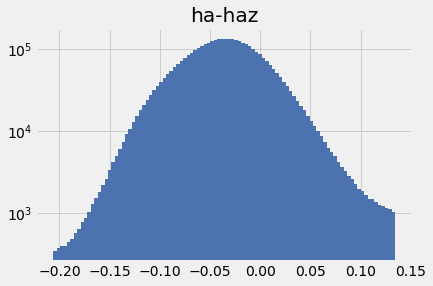

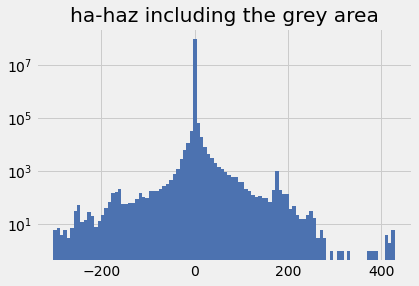

In [12]:
# Read the FITS image file
path = '/Users/tengizibrayev/Desktop/capstone/theli-reduc-2022/subtraction/crisitna-aligned/'
file = 'ha-haz.fits'
data = read(path+file)
hist(data,'ha-haz')

# hb image

Mean: -0.015080629847943783
Standard deviation: 0.0285087488591671


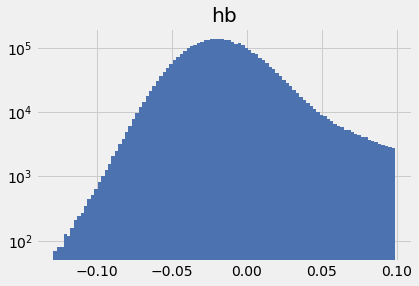

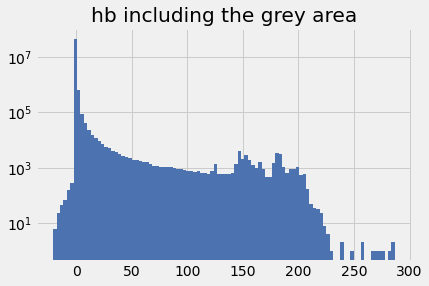

In [13]:
file = 'all-v404-hb.fits'
path = '/Users/tengizibrayev/Desktop/capstone/theli-reduc-2022/reduced_data/'
data = read(path + file)
hist(data, 'hb')

# ha image (separate)

Mean: -0.03116544522345066
Standard deviation: 0.05162205174565315


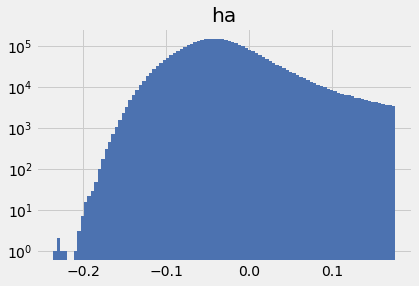

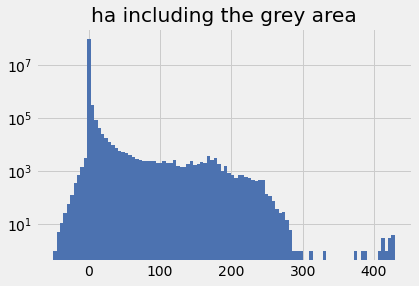

In [14]:
file = 'all-v404-ha.fits'
data = read(path + file)
hist(data, 'ha')

Mean: 0.002168191596865654
Standard deviation: 0.027331920340657234


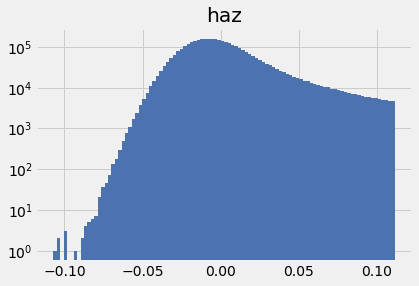

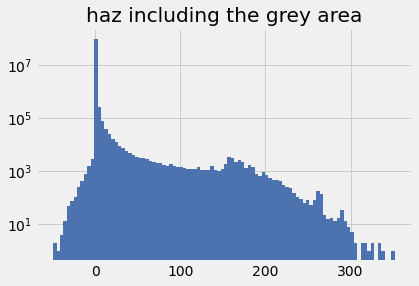

In [15]:
file = 'all-v404-haz.fits'
data = read(path + file)
hist(data, 'haz')
